# Random Forrest Algorithm

* The Random Forest algorithm is a *supervised learning algorithm* used for *classification and regression* tasks. 

* It combines **multiple decision trees to produce a more accurate and robust model**. 

* The algorithm **works by randomly selecting a subset of features at each decision node**, and using the *best split* to separate the data. 

* The **final prediction is made by taking a vote over all the individual decision trees**. 

* This approach helps to **reduce overfitting** and improve the accuracy of the model.


<img src="https://media.geeksforgeeks.org/wp-content/uploads/20240701170624/Random-Forest-Algorithm.webp" style=""/>

Image source: https://media.geeksforgeeks.org/wp-content/uploads/20240701170624/Random-Forest-Algorithm.webp

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20250627112439890354/Random-Forest-Effectiveness.webp"/>
<br>
Image source: https://media.geeksforgeeks.org/wp-content/uploads/20250627112439890354/Random-Forest-Effectiveness.webp



#* Ensembling Methods


<img src="https://cdn.corporatefinanceinstitute.com/assets/ensemble-methods.png"/>

* **Bagging** (Bootstrap Aggregating) is an ensembling method that involves **training multiple instances of the same model on different subsets of the training data**. 

* Each instance of the model is trained on a different subset of the data, which is generated by randomly sampling from the original dataset with replacement.

* The final prediction is made by taking a vote over all the individual models.

<img src="https://images.prismic.io/encord/34b910ef-a1e7-44ac-8e2c-0221c0e639f3_Ensemble+Learning+Bagging+%26+Boosting+-+Encord.png?auto=compress,format" style="width:700px; height:500px"/>
<img src="https://www.ibm.com/content/dam/connectedassets-adobe-cms/worldwide-content/creative-assets/s-migr/ul/g/4b/c9/ensemble-learning-bagging.png" style="width:800px; height:500px">

* **Boosting** is an ensembling method that involves **training multiple instances of the same model on the same dataset, but with different weights assigned to each instance**. 

* The weights are adjusted based on the performance of each instance, with higher weights assigned to instances that perform better.

* The final prediction is made by taking a weighted vote over all the individual models.


*# Code Example

In [ ]:
# import basic ml libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# import sklearn modules and functions fro classifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
# get data
# kaggle dataset link: https://www.kaggle.com/datasets/sujithmandala/simple-loan-classification-dataset/data
df = pd.read_csv('2_6_loan_status_dataset.csv')
df.head()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved
1,45,Female,Teacher,Master's,Single,62000,680,Approved
2,28,Male,Student,High School,Single,25000,590,Denied
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved


In [ ]:
# EDA
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              61 non-null     int64 
 1   gender           61 non-null     object
 2   occupation       61 non-null     object
 3   education_level  61 non-null     object
 4   marital_status   61 non-null     object
 5   income           61 non-null     int64 
 6   credit_score     61 non-null     int64 
 7   loan_status      61 non-null     object
dtypes: int64(3), object(5)
memory usage: 3.9+ KB


,age,income,credit_score
count,61.000000,61.000000,61.000000
mean,37.081967,78983.606557,709.836066
std,8.424755,33772.025802,72.674888
min,24.000000,25000.000000,560.000000
25%,30.000000,52000.000000,650.000000
50%,36.000000,78000.000000,720.000000
75%,43.000000,98000.000000,770.000000
max,55.000000,180000.000000,830.000000


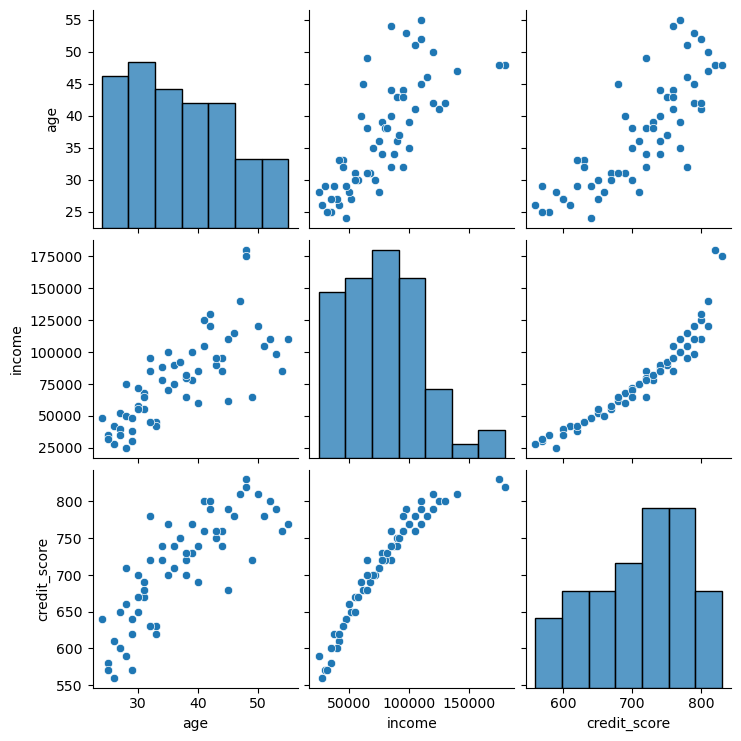

In [ ]:
# see the pairplots
sns.pairplot(df)
plt.show()

In [ ]:
df["loan_status"].value_counts()

loan_status
Approved    45
Denied      16
Name: count, dtype: int64

In [ ]:
df["gender"].value_counts()

gender
Male      31
Female    30
Name: count, dtype: int64

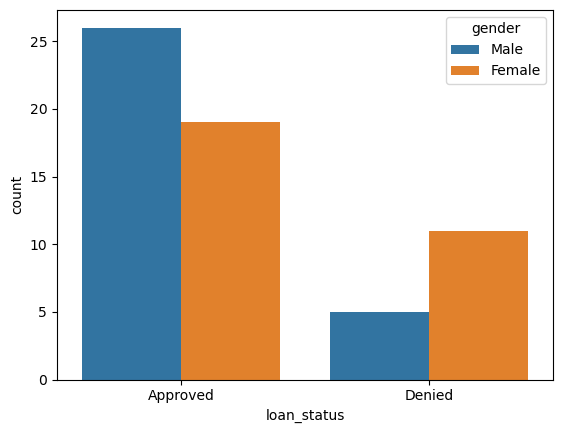

In [ ]:
# see the loan_status with hue gender
sns.countplot(x='loan_status', hue='gender', data=df)
plt.show()

In [ ]:
df.columns

Index(['age', 'gender', 'occupation', 'education_level', 'marital_status',
       'income', 'credit_score', 'loan_status'],
      dtype='object')

In [ ]:
df.isnull().sum()

age                0
gender             0
occupation         0
education_level    0
marital_status     0
income             0
credit_score       0
loan_status        0
dtype: int64

In [ ]:
df.head()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved
1,45,Female,Teacher,Master's,Single,62000,680,Approved
2,28,Male,Student,High School,Single,25000,590,Denied
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved


In [ ]:
# see all catgorical columns
categorical_columns=df.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['gender', 'occupation', 'education_level', 'marital_status',
       'loan_status'],
      dtype='object')


In [ ]:
# show all categorical colums values with for loop
for col in categorical_columns:
    print(df[col].value_counts())
    print("\n")

gender
Male      31
Female    30
Name: count, dtype: int64


occupation
Engineer        5
Teacher         2
Manager         2
Accountant      2
Nurse           2
Lawyer          2
Architect       2
Artist          2
IT              2
Doctor          2
Consultant      2
Analyst         2
Salesman        2
Marketing       2
Banker          2
Designer        2
Receptionist    2
Professor       2
Chef            2
Writer          2
Student         1
Pharmacist      1
Pilot           1
Researcher      1
Veterinarian    1
Sales           1
HR              1
Electrician     1
Realtor         1
Photographer    1
Editor          1
Programmer      1
Dentist         1
Musician        1
Psychologist    1
Server          1
Software        1
Stylist         1
Name: count, dtype: int64


education_level
Bachelor's     23
Master's       15
Doctoral       10
High School     7
Associate's     6
Name: count, dtype: int64


marital_status
Married    37
Single     24
Name: count, dtype: int64


loan_status

In [ ]:
# gender is one-hot encoding
# ocuupation is label encoding
# educational_level is ordinal encoding
# marital_status is one hot encoding
# loan_status is label encoding

education_level
Bachelor's     23
Master's       15
Doctoral       10
High School     7
Associate's     6
Name: count, dtype: int64


### What is encoding?
* Encoding is a process of converting categorical data into numerical data.
* It is **used because many machine learning algorithms require numerical data** to function.
* Encoding helps to **convert categorical data into numerical data**, which can then be fed into machine learning algorithms.


<img src="https://substackcdn.com/image/fetch/f_auto,q_auto:good,fl_progressive:steep/https%3A%2F%2Fsubstack-post-media.s3.amazonaws.com%2Fpublic%2Fimages%2F25e58739-0a9f-42ab-bba6-f932cee49139_962x1120.gif"/>

In [ ]:
# import one hot encoding
from sklearn.preprocessing import OneHotEncoder

# import label encoding
from sklearn.preprocessing import LabelEncoder

# import ordinal encoding
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
# pd.get_dummies(df["gender"]) with pandas one hot encoding 
# gender_df=pd.get_dummies(df["gender"],drop_first=True)
# gender_df.head()

# OR

# with sklearn one hot encoding
# gender is one-hot encoding
one_hot_encoder=OneHotEncoder()
gender_df=one_hot_encoder.fit_transform(df[["gender"]])

gender_df=gender_df.toarray()
gender_df=pd.DataFrame(gender_df,columns=["Female","Male"])
gender_df.head()


,Female,Male
0,0.0,1.0
1,1.0,0.0
2,0.0,1.0
3,1.0,0.0
4,0.0,1.0


In [ ]:
#concat with df
df=pd.concat([df,gender_df],axis=1)
df.head()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status,Female,Male
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved,0.0,1.0
1,45,Female,Teacher,Master's,Single,62000,680,Approved,1.0,0.0
2,28,Male,Student,High School,Single,25000,590,Denied,0.0,1.0
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved,1.0,0.0
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved,0.0,1.0


In [ ]:
# gender is one-hot encoding
# ocuupation is label encoding
# educational_level is ordinal encoding
# marital_status is one hot encoding
# loan_status is label encoding

In [ ]:
# marital_status is one hot encoding
# It creates just one new column as single
marital_status_df=pd.get_dummies(df["marital_status"],drop_first=True)
marital_status_df.head()

,Single
0,False
1,True
2,True
3,False
4,False


In [ ]:
# concat with df
df=pd.concat([df,marital_status_df],axis=1)
df.head()


,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status,Female,Male,Single
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved,0.0,1.0,False
1,45,Female,Teacher,Master's,Single,62000,680,Approved,1.0,0.0,True
2,28,Male,Student,High School,Single,25000,590,Denied,0.0,1.0,True
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved,1.0,0.0,False
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved,0.0,1.0,False


In [ ]:
# occupation is label encoding with sklearn
label_encoder=LabelEncoder()
occupation_df=label_encoder.fit_transform(df["occupation"])
occupation_df=pd.DataFrame(occupation_df,columns=["occupation_encoded"])
occupation_df.head()



,occupation_encoded
0,12
1,35
2,33
3,16
4,0


In [ ]:
# concat with df
df=pd.concat([df,occupation_df],axis=1)
df.head()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status,Female,Male,Single,occupation_encoded
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved,0.0,1.0,False,12
1,45,Female,Teacher,Master's,Single,62000,680,Approved,1.0,0.0,True,35
2,28,Male,Student,High School,Single,25000,590,Denied,0.0,1.0,True,33
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved,1.0,0.0,False,16
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved,0.0,1.0,False,0


In [ ]:
# gender is one-hot encoding
# ocuupation is label encoding
# educational_level is ordinal encoding
# marital_status is one hot encoding
# loan_status is label encoding

In [ ]:
# educational_level is ordinal encoding
df["education_level"].value_counts()


education_level
Bachelor's     23
Master's       15
Doctoral       10
High School     7
Associate's     6
Name: count, dtype: int64

In [ ]:
# high school is 1, associate is 2, bachelor is 3, master is 4, doctoral is 5

# first alternative is using map function
# df["education_level_mapped"] = df["education_level"].map({"High School": 1, "Associate's": 2, "Bachelor's": 3, "Master's": 4, "Doctoral": 5})

#second alternative is using replace function
# df["education_level_mapped"] = df["education_level"].replace({"High School": 1, "Associate's": 2, "Bachelor's": 3, "Master's": 4, "Doctoral": 5})

# third alternative AND USE THIS is using ordinal encoding
ordinal_encoder=OrdinalEncoder( categories=[["High School","Associate's","Bachelor's","Master's","Doctoral"]])
education_level_df=ordinal_encoder.fit_transform(df[["education_level"]])

education_level_df=pd.DataFrame(education_level_df,columns=["education_level_encoded"])
df=pd.concat([df,education_level_df],axis=1)
df.head()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status,Female,Male,Single,occupation_encoded,education_level_encoded
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved,0.0,1.0,False,12,2.0
1,45,Female,Teacher,Master's,Single,62000,680,Approved,1.0,0.0,True,35,3.0
2,28,Male,Student,High School,Single,25000,590,Denied,0.0,1.0,True,33,0.0
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved,1.0,0.0,False,16,2.0
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved,0.0,1.0,False,0,2.0


In [ ]:
# loan_status is label encoding with sklearn it is possible BUT
# label_encoder=LabelEncoder()
# loan_status_df=label_encoder.fit_transform(df["loan_status"])
# loan_status_df=pd.DataFrame(loan_status_df,columns=["loan_status"])
# loan_status_df.head()

In [ ]:
# we will change loan status with map function
df["loan_status_mapped"] = df["loan_status"].map({"Approved": 1, "Denied": 0})
df.head()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status,Female,Male,Single,occupation_encoded,education_level_encoded,loan_status_mapped
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved,0.0,1.0,False,12,2.0,1
1,45,Female,Teacher,Master's,Single,62000,680,Approved,1.0,0.0,True,35,3.0,1
2,28,Male,Student,High School,Single,25000,590,Denied,0.0,1.0,True,33,0.0,0
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved,1.0,0.0,False,16,2.0,1
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved,0.0,1.0,False,0,2.0,1


In [ ]:
# drop non-numerical columns
df=df.drop(columns=["gender","education_level","marital_status", "occupation","loan_status"],axis=1)
df.head()

,age,income,credit_score,Female,Male,Single,occupation_encoded,education_level_encoded,loan_status_mapped
0,32,85000,720,0.0,1.0,False,12,2.0,1
1,45,62000,680,1.0,0.0,True,35,3.0,1
2,28,25000,590,0.0,1.0,True,33,0.0,0
3,51,105000,780,1.0,0.0,False,16,2.0,1
4,36,75000,710,0.0,1.0,False,0,2.0,1


In [ ]:
df.to_csv("loan_data_cleaned.csv",index=False)

In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      61 non-null     int64  
 1   income                   61 non-null     int64  
 2   credit_score             61 non-null     int64  
 3   Female                   61 non-null     float64
 4   Male                     61 non-null     float64
 5   Single                   61 non-null     bool   
 6   occupation_encoded       61 non-null     int64  
 7   education_level_encoded  61 non-null     float64
 8   loan_status_mapped       61 non-null     int64  
dtypes: bool(1), float64(3), int64(5)
memory usage: 4.0 KB


,age,income,credit_score,Female,Male,occupation_encoded,education_level_encoded,loan_status_mapped
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,37.081967,78983.606557,709.836066,0.491803,0.508197,16.754098,2.245902,0.737705
std,8.424755,33772.025802,72.674888,0.504082,0.504082,11.062935,1.192417,0.443533
min,24.000000,25000.000000,560.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,52000.000000,650.000000,0.000000,0.000000,8.000000,2.000000,0.000000
50%,36.000000,78000.000000,720.000000,0.000000,1.000000,15.000000,2.000000,1.000000
75%,43.000000,98000.000000,770.000000,1.000000,1.000000,26.000000,3.000000,1.000000
max,55.000000,180000.000000,830.000000,1.000000,1.000000,37.000000,4.000000,1.000000


-------------------


### Explain also Column Transformer Library


* **ColumnTransformer** is a class in sklearn that can be used to transform a dataset
* it can be used to scale/normalize, encode categorical variables and transform text data
*  it can be used in a **pipeline to preprocess data before feeding it to a model**


In [ ]:
df2 = pd.read_csv('2_6_loan_status_dataset.csv')
df2.head()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved
1,45,Female,Teacher,Master's,Single,62000,680,Approved
2,28,Male,Student,High School,Single,25000,590,Denied
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved


In [ ]:
# gender is one-hot encoding
# ocuupation is label encoding
# educational_level is ordinal encoding
# marital_status is one hot encoding
# loan_status is label encoding

In [ ]:
# Before starting preprocessing with CoulumnTransformer define X and y
X_new=df2.drop(columns=["loan_status"])
y_new=df["loan_status"]

X_new.head()

,age,gender,occupation,education_level,marital_status,income,credit_score
0,32,Male,Engineer,Bachelor's,Married,85000,720
1,45,Female,Teacher,Master's,Single,62000,680
2,28,Male,Student,High School,Single,25000,590
3,51,Female,Manager,Bachelor's,Married,105000,780
4,36,Male,Accountant,Bachelor's,Married,75000,710


In [ ]:
y_new

0     Approved
1     Approved
2       Denied
3     Approved
4     Approved
        ...   
56    Approved
57      Denied
58    Approved
59    Approved
60    Approved
Name: loan_status, Length: 61, dtype: object

In [ ]:
# Import column Transformer
from sklearn.compose import ColumnTransformer


# Import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
# create column transformer. but if you use label encoder you get error
ct=ColumnTransformer(
    [
        ("gender_onehot",OneHotEncoder(),["gender"]),
        ("marital_status_onehot",OneHotEncoder(),["marital_status"]),
        ("education_level_ordinal",OrdinalEncoder(categories=[["High School","Associate's","Bachelor's","Master's","Doctoral"]]),["education_level"]),
        ("occupation_label",LabelEncoder(),["occupation"])
    ],
    remainder="passthrough"
)

ct.fit_transform(X_new)


TypeError: LabelEncoder.fit_transform() takes 2 positional arguments but 3 were given

In [ ]:
# create column transformer. convert label to ordinal
ct=ColumnTransformer(
    [
        ("gender_onehot",OneHotEncoder(sparse_output=False,  drop="first"),["gender"]),
        ("marital_status_onehot",OneHotEncoder(sparse_output=False, drop="first"),["marital_status"]),
        ("education_level_ordinal",OrdinalEncoder(categories=[["High School","Associate's","Bachelor's","Master's","Doctoral"]]),["education_level"]),
        ("occupation_label",OrdinalEncoder(),["occupation"])
    ],
    remainder="passthrough"
)

X_new_transformed_array=ct.fit_transform(X_new)
print(X_new_transformed_array)


[[1.00e+00 0.00e+00 2.00e+00 1.20e+01 3.20e+01 8.50e+04 7.20e+02]
 [0.00e+00 1.00e+00 3.00e+00 3.50e+01 4.50e+01 6.20e+04 6.80e+02]
 [1.00e+00 1.00e+00 0.00e+00 3.30e+01 2.80e+01 2.50e+04 5.90e+02]
 [0.00e+00 0.00e+00 2.00e+00 1.60e+01 5.10e+01 1.05e+05 7.80e+02]
 [1.00e+00 0.00e+00 2.00e+00 0.00e+00 3.60e+01 7.50e+04 7.10e+02]
 [0.00e+00 1.00e+00 1.00e+00 1.90e+01 2.40e+01 4.80e+04 6.40e+02]
 [1.00e+00 0.00e+00 4.00e+00 1.50e+01 4.20e+01 1.20e+05 7.90e+02]
 [0.00e+00 1.00e+00 2.00e+00 3.00e+00 2.90e+01 3.80e+04 6.20e+02]
 [1.00e+00 0.00e+00 3.00e+00 1.40e+01 3.70e+01 9.20e+04 7.50e+02]
 [0.00e+00 0.00e+00 4.00e+00 9.00e+00 4.80e+01 1.80e+05 8.20e+02]
 [1.00e+00 0.00e+00 3.00e+00 6.00e+00 5.50e+01 1.10e+05 7.70e+02]
 [0.00e+00 1.00e+00 2.00e+00 1.00e+00 3.10e+01 6.80e+04 6.90e+02]
 [1.00e+00 1.00e+00 0.00e+00 3.00e+01 2.60e+01 4.20e+04 6.10e+02]
 [0.00e+00 0.00e+00 2.00e+00 1.70e+01 3.90e+01 7.80e+04 7.30e+02]
 [1.00e+00 0.00e+00 3.00e+00 2.00e+00 4.40e+01 9.50e+04 7.60e+02]
 [0.00e+00

In [ ]:
X_new

,age,gender,occupation,education_level,marital_status,income,credit_score
0,32,Male,Engineer,Bachelor's,Married,85000,720
1,45,Female,Teacher,Master's,Single,62000,680
2,28,Male,Student,High School,Single,25000,590
3,51,Female,Manager,Bachelor's,Married,105000,780
4,36,Male,Accountant,Bachelor's,Married,75000,710
...,...,...,...,...,...,...,...
56,39,Male,Architect,Master's,Married,100000,770
57,25,Female,Receptionist,High School,Single,32000,570
58,43,Male,Banker,Bachelor's,Married,95000,760
59,30,Female,Writer,Master's,Single,55000,650


In [ ]:
X_new.columns

Index(['age', 'gender', 'occupation', 'education_level', 'marital_status',
       'income', 'credit_score'],
      dtype='object')

In [ ]:
# convert to data frame
X_new_transformed_df=pd.DataFrame(X_new_transformed_array,columns=[X_new.columns])
X_new_transformed_df.head()

,age,gender,occupation,education_level,marital_status,income,credit_score
0,1.0,0.0,2.0,12.0,32.0,85000.0,720.0
1,0.0,1.0,3.0,35.0,45.0,62000.0,680.0
2,1.0,1.0,0.0,33.0,28.0,25000.0,590.0
3,0.0,0.0,2.0,16.0,51.0,105000.0,780.0
4,1.0,0.0,2.0,0.0,36.0,75000.0,710.0


In [ ]:
X_new

,age,gender,occupation,education_level,marital_status,income,credit_score
0,32,Male,Engineer,Bachelor's,Married,85000,720
1,45,Female,Teacher,Master's,Single,62000,680
2,28,Male,Student,High School,Single,25000,590
3,51,Female,Manager,Bachelor's,Married,105000,780
4,36,Male,Accountant,Bachelor's,Married,75000,710
...,...,...,...,...,...,...,...
56,39,Male,Architect,Master's,Married,100000,770
57,25,Female,Receptionist,High School,Single,32000,570
58,43,Male,Banker,Bachelor's,Married,95000,760
59,30,Female,Writer,Master's,Single,55000,650


--------------------

### Model training and evalution

In [ ]:
# define X and y
X=df.drop(columns=["loan_status_mapped"])
y=df["loan_status_mapped"]
print(X.shape)
print(y.shape)

(61, 8)
(61,)


In [ ]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(48, 8)
(13, 8)
(48,)
(13,)


In [ ]:
# create random forrest classifier and train
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
#predict
y_pred=model.predict(X_test)
y_pred

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1])

In [ ]:
# accuracy metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

print("Accuracy:",accuracy_score(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))

Accuracy: 0.9230769230769231
Confusion Matrix:
 [[4 0]
 [1 8]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.89      0.94         9

    accuracy                           0.92        13
   macro avg       0.90      0.94      0.92        13
weighted avg       0.94      0.92      0.93        13



In [ ]:
# In the random forrest we can sse importance of features 
model.feature_importances_

array([0.17963769, 0.22905875, 0.37460535, 0.01346529, 0.00128938,
       0.1183956 , 0.03333274, 0.0502152 ])

In [ ]:
# see with feature importnce the most important features with column names 
feature_importance=pd.DataFrame(model.feature_importances_,index=X.columns,columns=["importance"]).sort_values("importance",ascending=False)
feature_importance

,importance
credit_score,0.374605
income,0.229059
age,0.179638
Single,0.118396
education_level_encoded,0.050215
occupation_encoded,0.033333
Female,0.013465
Male,0.001289


### Hyperparameters in Random Forrest Classifier

* Hyperparameters are configuration settings used to control the learning process of machine learning algorithms.
* Unlike model parameters (which are learned from data), hyperparameters are set before training and influence how the model learns.
* In Random Forest, hyperparameters are:
* - n_estimators: the number of trees in the forest
* - max_depth: the maximum depth of each tree
* - min_samples_split: the minimum number of samples required to split an internal node
* - min_samples_leaf: the minimum number of samples required to be at a leaf node
* - max_features: the maximum number of features to consider at each split
* - max_leaf_nodes: the maximum number of leaf nodes in the tree
* - random_state: the seed used to shuffle the data
* - n_jobs: the number of jobs to run in parallel. If -1, all CPUs are used.


In [ ]:
# use hyperparameters with GridSeachCV to understand which is best

from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [50, 100, 200, 300, 500], 'max_depth': [None, 2, 5, 10, 20], 'min_samples_split': [2, 5, 10]}

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)



Best Parameters: {'max_depth': 2, 'min_samples_split': 10, 'n_estimators': 50}
Best Score: 1.0
Accuracy: 0.9230769230769231
Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.89      0.94         9

    accuracy                           0.92        13
   macro avg       0.90      0.94      0.92        13
weighted avg       0.94      0.92      0.93        13

Confusion Matrix:
[[4 0]
 [1 8]]


In [ ]:
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)



Best Parameters: {'max_depth': 2, 'min_samples_split': 10, 'n_estimators': 50}
Best Score: 1.0


In [ ]:
y_pred = grid_search.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9230769230769231
Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.89      0.94         9

    accuracy                           0.92        13
   macro avg       0.90      0.94      0.92        13
weighted avg       0.94      0.92      0.93        13

Confusion Matrix:
[[4 0]
 [1 8]]


## 2. Random Forrest Regressor


## 2. Random Forrest Regressor

* Random Forrest Regressor is an ensemble learning method for regression tasks. 

* It consists of **multiple decision trees**, each of which is trained on a random subset of features and samples from the training data. 

* **Unlike Random Forrest Classifier**, which uses voting to predict the class label, **Random Forrest Regressor uses the average of the predictions from each decision tree** to predict the target variable.

* This approach helps to reduce overfitting and improve the accuracy of the model. 

* The main difference between Random Forrest Regressor and other ensemble methods is that **it does not use voting to predict the target variable**, but rather uses the **average of the predictions** from each decision tree. 

* This makes Random Forrest Regressor more suitable for regression tasks, where the goal is to predict a continuous value rather than a class label.


<img src="https://cdn.prod.website-files.com/5e6f9b297ef3941db2593ba1/5f6315207ab68b113cf57b1c_Screenshot%202020-09-17%20at%2009.49.20.png">

In [ ]:
# import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# import sklearn common modules
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# load the dataset for ankara house prices
df = pd.read_csv('2_6_ankara_house_prices_cleaned_dataset.csv')
df.head()

,Unnamed: 0,RoomCount,Floor,Size(m2),District,Price(TL),Age_labeled
0,0,4,3.0,130.0,Akyurt,3450000,0
1,1,5,2.0,175.0,Akyurt,3975000,0
2,2,1,1.0,550.0,Akyurt,3600000,1
3,3,5,4.0,170.0,Akyurt,3705000,7
4,4,4,1.0,110.0,Akyurt,2099999,7


In [ ]:
# clean the dataset
df=df.drop("Unnamed: 0",axis=1)
df.head()

,RoomCount,Floor,Size(m2),District,Price(TL),Age_labeled
0,4,3.0,130.0,Akyurt,3450000,0
1,5,2.0,175.0,Akyurt,3975000,0
2,1,1.0,550.0,Akyurt,3600000,1
3,5,4.0,170.0,Akyurt,3705000,7
4,4,1.0,110.0,Akyurt,2099999,7


In [ ]:
# convert all column name to lover case (optional)
df.columns=df.columns.str.lower()
df.head()

,roomcount,floor,size(m2),district,price(tl),age_labeled
0,4,3.0,130.0,Akyurt,3450000,0
1,5,2.0,175.0,Akyurt,3975000,0
2,1,1.0,550.0,Akyurt,3600000,1
3,5,4.0,170.0,Akyurt,3705000,7
4,4,1.0,110.0,Akyurt,2099999,7


In [ ]:
# understand the data and rleation ship
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10244 entries, 0 to 10243
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   roomcount    10244 non-null  int64  
 1   floor        10244 non-null  float64
 2   size(m2)     10244 non-null  float64
 3   district     10244 non-null  object 
 4   price(tl)    10244 non-null  int64  
 5   age_labeled  10244 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 480.3+ KB


,roomcount,floor,size(m2),price(tl),age_labeled
count,10244.000000,10244.000000,10244.000000,1.024400e+04,10244.000000
mean,4.033483,2.904334,139.771964,3.898217e+06,4.071945
std,0.870930,3.460073,46.353749,1.993045e+06,2.886137
min,1.000000,-3.000000,21.000000,0.000000e+00,0.000000
25%,4.000000,1.000000,120.000000,2.535000e+06,2.000000
50%,4.000000,2.000000,130.000000,3.375000e+06,4.000000
75%,4.000000,3.000000,150.000000,4.650000e+06,7.000000
max,10.000000,30.000000,700.000000,1.350000e+07,8.000000


In [ ]:
df["district"].value_counts()

district
Mamak              1404
Keçiören           1400
Sincan             1312
Etimesgut          1311
Çankaya            1149
Pursaklar           942
Altındağ            937
Yenimahalle         874
Polatlı             414
Gölbaşı             372
Çubuk                56
Akyurt               31
Elmadağ              16
Kahramankazan        14
Beypazarı             4
Bala                  3
Ayaş                  1
Güdül                 1
Kızılcahamam          1
Nallıhan              1
Şereflikoçhisar       1
Name: count, dtype: int64

In [ ]:
# Convert the district column to label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['district'] = le.fit_transform(df['district'])
df.head()

,roomcount,floor,size(m2),district,price(tl),age_labeled
0,4,3.0,130.0,0,3450000,0
1,5,2.0,175.0,0,3975000,0
2,1,1.0,550.0,0,3600000,1
3,5,4.0,170.0,0,3705000,7
4,4,1.0,110.0,0,2099999,7


In [ ]:
df["district"].value_counts()

district
12    1404
10    1400
16    1312
6     1311
18    1149
15     942
1      937
17     874
14     414
7      372
19      56
0       31
5       16
9       14
4        4
3        3
2        1
8        1
11       1
13       1
20       1
Name: count, dtype: int64

In [ ]:
# control price target colums if are there any problems
df["price(tl)"].sort_values()

6174           0
3675           0
2149      750000
148       787500
7013      810000
          ...   
1784    13275000
1489    13350000
7430    13350000
2028    13350000
2486    13500000
Name: price(tl), Length: 10244, dtype: int64

In [ ]:
# drop rows where price is 0 rows
df.drop(df[df["price(tl)"] == 0].index, inplace=True)
df["price(tl)"].sort_values()

2149      750000
148       787500
7013      810000
6985      825000
6787      825000
          ...   
1784    13275000
1489    13350000
2028    13350000
7430    13350000
2486    13500000
Name: price(tl), Length: 10242, dtype: int64

In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 10242 entries, 0 to 10243
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   roomcount    10242 non-null  int64  
 1   floor        10242 non-null  float64
 2   size(m2)     10242 non-null  float64
 3   district     10242 non-null  int64  
 4   price(tl)    10242 non-null  int64  
 5   age_labeled  10242 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 560.1 KB


,roomcount,floor,size(m2),district,price(tl),age_labeled
count,10242.000000,10242.000000,10242.000000,10242.000000,1.024200e+04,10242.000000
mean,4.033392,2.904511,139.770455,11.720660,3.898978e+06,4.071959
std,0.870963,3.460359,46.357504,5.208173,1.992495e+06,2.885877
min,1.000000,-3.000000,21.000000,0.000000,7.500000e+05,0.000000
25%,4.000000,1.000000,120.000000,7.000000,2.535000e+06,2.000000
50%,4.000000,2.000000,130.000000,12.000000,3.375000e+06,4.000000
75%,4.000000,3.000000,150.000000,16.000000,4.650000e+06,7.000000
max,10.000000,30.000000,700.000000,20.000000,1.350000e+07,8.000000


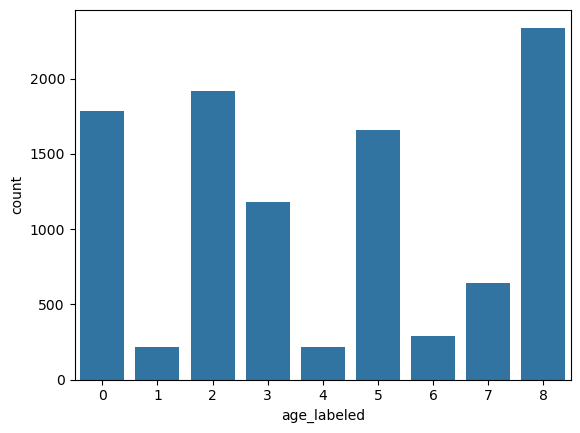

In [ ]:
# see age_labeled with hue district
sns.countplot(x='age_labeled', data=df)
plt.show()

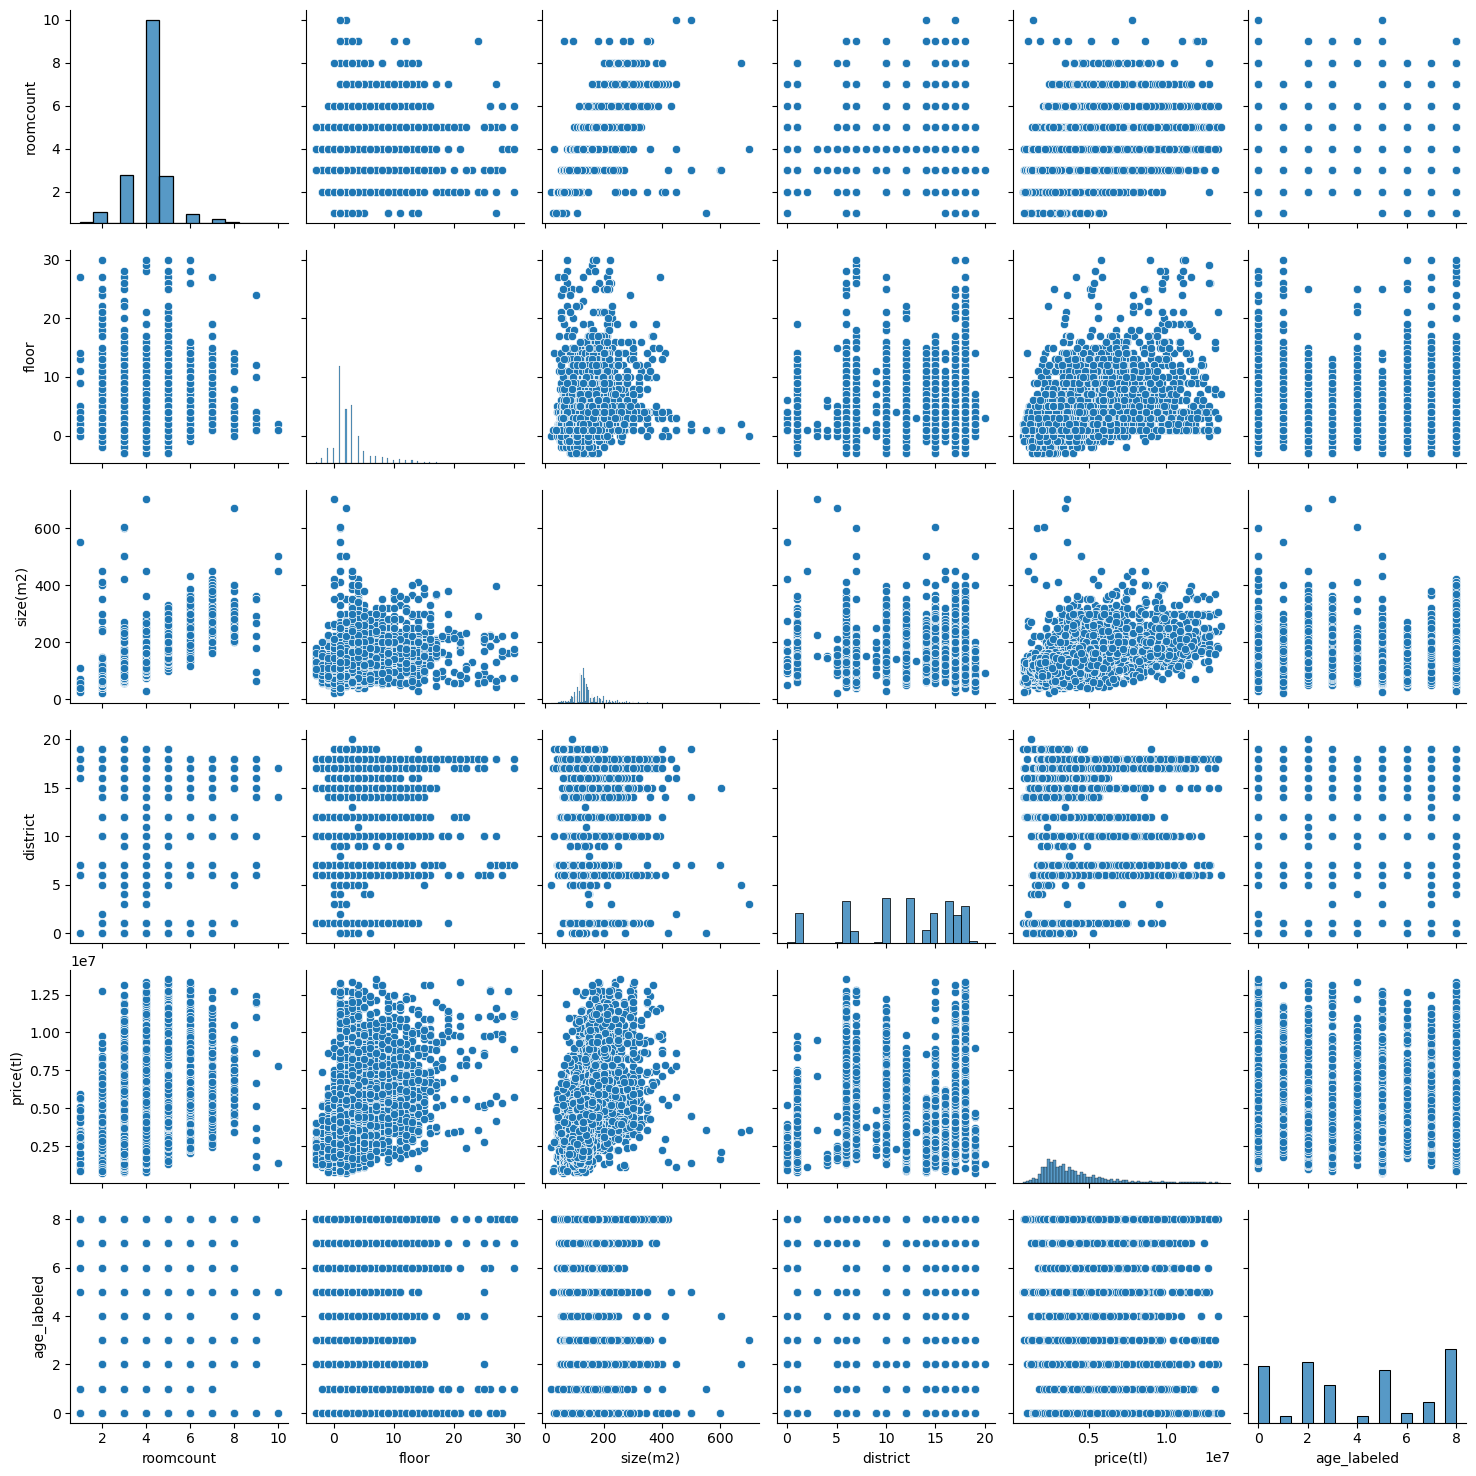

In [ ]:
# see pairplots
sns.pairplot(df)
plt.show()

In [ ]:
# split the data
X = df.drop("price(tl)", axis=1)
y = df["price(tl)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# scale X_train and X_test

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
print(X_train_scaled.shape)
print(X_test_scaled.shape)
print(y_train.shape)
print(y_test.shape)

(8193, 5)
(2049, 5)
(8193,)
(2049,)


In [ ]:
X_train_scaled

array([[ 1.11448096,  1.17891808,  0.45219237, -2.07137528, -1.41478239],
       [-0.03667165, -0.54644603, -0.3168192 ,  0.81979391,  1.01533486],
       [-0.03667165,  0.8913574 , -0.3168192 , -1.10765221, -0.37330357],
       ...,
       [-1.18782426, -0.25888534, -0.75625438,  0.04881546, -0.72046318],
       [ 1.11448096, -1.40912808, -0.09710161, -2.07137528,  1.36249447],
       [-0.03667165, -0.54644603,  0.23247478,  0.6270493 ,  1.36249447]])

In [ ]:
# Create a linear model first than I will create a random forrest regressor and compare them
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score, mean_squared_error



lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)



LinearRegression()

In [ ]:
#predict with train set and both test set. so I can understand the overfitting
y_pred_train = lin_reg.predict(X_train_scaled)
y_pred_test = lin_reg.predict(X_test_scaled)


In [ ]:
# see the accuracy
print("R2 score on train set:", r2_score(y_train, y_pred_train))
print("R2 score on test set:", r2_score(y_test, y_pred_test))

print("MSE on train set:", mean_squared_error(y_train, y_pred_train))
print("MSE on test set:", mean_squared_error(y_test, y_pred_test))

R2 score on train set: 0.3934091698879024
R2 score on test set: 0.36587546117205116
MSE on train set: 2374693650147.764
MSE on test set: 2654154970857.4663


In [ ]:
# with Random Forrrest Regressor *** you should see power of random forrest ***


rf_reg = RandomForestRegressor()
rf_reg.fit(X_train_scaled, y_train)



RandomForestRegressor()

In [ ]:
y_pred_train = rf_reg.predict(X_train_scaled)
y_pred_test = rf_reg.predict(X_test_scaled)

print("R2 score on train set:", r2_score(y_train, y_pred_train))
print("R2 score on test set:", r2_score(y_test, y_pred_test))

print("MSE on train set:", mean_squared_error(y_train, y_pred_train))
print("MSE on test set:", mean_squared_error(y_test, y_pred_test))

In [192]:
# Try to increase accuracy score with hyperparameters
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_features': ['auto', 'sqrt', 'log2']
    # 'max_depth': [None, 10, 20, 30]
    # 'min_samples_split': [2, 5, 10],
    # 'min_samples_leaf': [1, 2, 4],
    # 'bootstrap': [True, False]
}


grid_search = GridSearchCV(estimator=rf_reg, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

best_model = grid_search.best_estimator_
y_pred_train = best_model.predict(X_train_scaled)
y_pred_test = best_model.predict(X_test_scaled)

print("R2 score on train set:", r2_score(y_train, y_pred_train))
print("R2 score on test set:", r2_score(y_test, y_pred_test))

print("MSE on train set:", mean_squared_error(y_train, y_pred_train))
print("MSE on test set:", mean_squared_error(y_test, y_pred_test))


c:\Users\guray.arik\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\guray.arik\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\guray.arik\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "c:\Users\guray.arik\AppData\Local\anac

Best hyperparameters: {'max_features': 'log2', 'n_estimators': 200}
R2 score on train set: 0.9194686769685682
R2 score on test set: 0.6962415409715218
MSE on train set: 315265599061.8901
MSE on test set: 1271393826614.2139


---- Compare all regressor models-----------------

In [208]:
df = pd.read_csv('2_6_ankara_house_prices_cleaned_dataset.csv')
df.head()

,Unnamed: 0,RoomCount,Floor,Size(m2),District,Price(TL),Age_labeled
0,0,4,3.0,130.0,Akyurt,3450000,0
1,1,5,2.0,175.0,Akyurt,3975000,0
2,2,1,1.0,550.0,Akyurt,3600000,1
3,3,5,4.0,170.0,Akyurt,3705000,7
4,4,4,1.0,110.0,Akyurt,2099999,7


In [209]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,RoomCount,Floor,Size(m2),District,Price(TL),Age_labeled
0,4,3.0,130.0,Akyurt,3450000,0
1,5,2.0,175.0,Akyurt,3975000,0
2,1,1.0,550.0,Akyurt,3600000,1
3,5,4.0,170.0,Akyurt,3705000,7
4,4,1.0,110.0,Akyurt,2099999,7


In [210]:
# encode disctrict column
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['District'] = le.fit_transform(df['District'])
df.head()

,RoomCount,Floor,Size(m2),District,Price(TL),Age_labeled
0,4,3.0,130.0,0,3450000,0
1,5,2.0,175.0,0,3975000,0
2,1,1.0,550.0,0,3600000,1
3,5,4.0,170.0,0,3705000,7
4,4,1.0,110.0,0,2099999,7


In [211]:
#split data
from sklearn.model_selection import train_test_split

X = df.drop('Price(TL)', axis=1)
y = df['Price(TL)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [212]:
# scale X_train and X_test
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [213]:
X_train_scaled

array([[-0.03871836, -0.260621  , -0.10081801, -0.33913255,  1.35745723],
       [-0.03871836, -0.54765084, -0.86862441,  0.04601036, -0.37450011],
       [ 1.10675794,  1.17452822,  0.44761514, -2.07227568, -1.41367452],
       ...,
       [ 3.39771053,  0.02640885,  2.42197446,  0.04601036, -0.37450011],
       [ 1.10675794, -1.40874036, -0.10081801, -2.07227568,  1.35745723],
       [ 1.10675794, -0.54765084,  0.44761514,  0.62372474, -1.41367452]])

In [214]:
X_test_scaled

array([[-0.03871836,  0.60046853, -0.42987789, -2.07227568, -0.72089158],
       [-0.03871836,  0.31343869, -0.42987789,  0.81629619, -0.37450011],
       [-0.03871836, -0.260621  , -0.97831104, -1.10941839,  0.31828283],
       ...,
       [-0.03871836, -0.54765084,  0.11855525,  0.81629619,  1.35745723],
       [-0.03871836, -0.260621  , -0.21050464, -2.07227568,  1.35745723],
       [ 1.10675794, -0.260621  ,  0.88636165, -1.10941839, -1.41367452]])

In [215]:
# implement all regressor methods with a python function and compare the results

def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
   
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    
    return r2_train, r2_test, mse_train, mse_test

In [216]:
# import all egressor method we learned so far (Linear, Polynomial, Ridge, Lasso, ElasticNet, KNNRegressor, DecisionTreeRegressor,SVR, Random Forrest)
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

from sklearn.preprocessing import PolynomialFeatures

from sklearn.neighbors import KNeighborsRegressor

from sklearn.tree import DecisionTreeRegressor

from sklearn.svm import SVR

from sklearn.ensemble import RandomForestRegressor

In [217]:
# create a list of regressor methods
regressors = [LinearRegression(), Ridge(), Lasso(), ElasticNet(), KNeighborsRegressor(), DecisionTreeRegressor(), SVR(), RandomForestRegressor()]


In [218]:
# create a list to store the results
results = []
for regressor in regressors:
    r2_train, r2_test, mse_train, mse_test = evaluate_model(regressor, X_train_scaled, y_train, X_test_scaled, y_test)
    results.append([regressor.__class__.__name__, r2_train, r2_test, mse_train, mse_test])


# print the results with a html table
import pandas as pd
results_df = pd.DataFrame(results, columns=["Regressor", "R2 Train", "R2 Test", "MSE Train", "MSE Test"])
results_df

,Regressor,R2 Train,R2 Test,MSE Train,MSE Test
0,LinearRegression,0.397100,0.347091,2.392622e+12,2.601443e+12
1,Ridge,0.397100,0.347108,2.392623e+12,2.601378e+12
2,Lasso,0.397100,0.347092,2.392622e+12,2.601442e+12
3,ElasticNet,0.369314,0.337870,2.502894e+12,2.638184e+12
4,KNeighborsRegressor,0.743012,0.596519,1.019863e+12,1.607625e+12
5,DecisionTreeRegressor,0.948053,0.518810,2.061543e+11,1.917249e+12
6,SVR,-0.067193,-0.074853,4.235185e+12,4.282633e+12
7,RandomForestRegressor,0.916361,0.683474,3.319233e+11,1.261162e+12


In [221]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# Kapsamlı hiperparametre arama aralığı
param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10]
    # 'epsilon': [0.01, 0.1, 0.5, 1],
    # 'gamma': ['scale', 'auto', 0.1, 1, 10]
}

In [222]:
svr = SVR()
grid_search = GridSearchCV(
    svr, 
    param_grid, 
    cv=5
)
grid_search.fit(X_train_scaled, y_train)

# Best params
print("En iyi parametreler:", grid_search.best_params_)

# Best model
best_svr = grid_search.best_estimator_
y_pred_train = best_svr.predict(X_train_scaled)
y_pred_test = best_svr.predict(X_test_scaled)

print("R2 score on train set:", r2_score(y_train, y_pred_train))
print("R2 score on test set:", r2_score(y_test, y_pred_test))

print("MSE on train set:", mean_squared_error(y_train, y_pred_train))
print("MSE on test set:", mean_squared_error(y_test, y_pred_test))

En iyi parametreler: {'C': 10, 'kernel': 'linear'}
R2 score on train set: -0.02407266705751443
R2 score on test set: -0.03399616168102626
MSE on train set: 4064059181618.168
MSE on test set: 4119845032913.5273
